<a href="https://colab.research.google.com/github/Nithyasri-Babu/customer-segmentation/blob/main/CHURN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load dataset using the file path
data_path ='/content/supermarket_sales - Sheet1.csv' # Replace with your actual file path
data = pd.read_csv(data_path)

# Display the first few rows
print(data.head())


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [ ]:
# Feature: Days Since Last Purchase
data['DaysSinceLastPurchase'] = (pd.to_datetime('today') - pd.to_datetime(data['Date'])).dt.days

# Create a 'Churn' column based on logical rules (e.g., last purchase > 90 days)
data['Churn'] = data['DaysSinceLastPurchase'].apply(lambda x: 1 if x > 90 else 0)

print(data[['DaysSinceLastPurchase', 'Churn']].head())


   DaysSinceLastPurchase  Churn
0                   2298      1
1                   2236      1
2                   2241      1
3                   2276      1
4                   2264      1


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
categorical_columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Scale numerical columns
features = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price',
            'Quantity', 'Total', 'Payment', 'cogs', 'gross margin percentage',
            'gross income', 'Rating', 'DaysSinceLastPurchase']
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define features and target
X = data[features]
y = data['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define features and target
X = data[features]
y = data['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
# Live data example with proper feature names
live_data = pd.DataFrame({
    'Branch': [label_encoders['Branch'].transform(['A'])[0]],  # Replace 'A' with the actual branch name
    'City': [label_encoders['City'].transform(['Yangon'])[0]], # Replace 'Yangon' with the actual city name
    'Customer type': [label_encoders['Customer type'].transform(['Member'])[0]],  # Replace 'Member' with the actual customer type
    'Gender': [label_encoders['Gender'].transform(['Female'])[0]],  # Replace 'Female' with the actual gender
    'Product line': [label_encoders['Product line'].transform(['Health and beauty'])[0]],  # Replace 'Health and beauty' with the actual product line
    'Unit price': [45],
    'Quantity': [5],
    'Total': [236.25],
    'Payment': [label_encoders['Payment'].transform(['Ewallet'])[0]],  # Replace 'Ewallet' with the actual payment method
    'cogs': [225],
    'gross margin percentage': [4.76],
    'gross income': [11.25],
    'Rating': [8],
    'DaysSinceLastPurchase': [120]
})

# Ensure the live_data DataFrame has the exact same column names as the training dataset
live_data = live_data[features]  # Use 'features' list from the training step

# Scale the live data using the previously saved scaler
live_data_scaled = scaler.transform(live_data)

# Predict churn using the trained model
prediction = model.predict(live_data_scaled)
print("Live Customer Churn Prediction:", prediction)


Live Customer Churn Prediction: [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


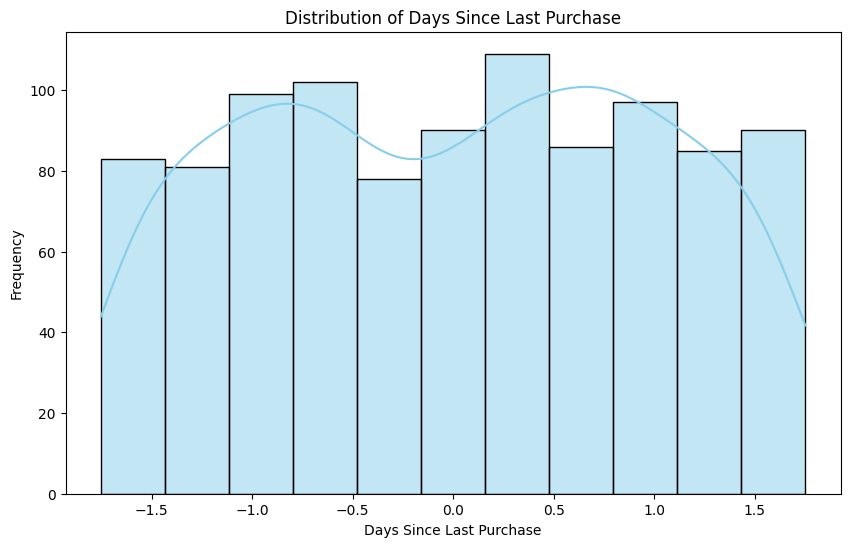

In [ ]:
#1. Distribution of Days Since Last Purchase
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of Days Since Last Purchase
plt.figure(figsize=(10, 6))
sns.histplot(data['DaysSinceLastPurchase'], kde=True, color='skyblue')
plt.title("Distribution of Days Since Last Purchase")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Frequency")
plt.show()

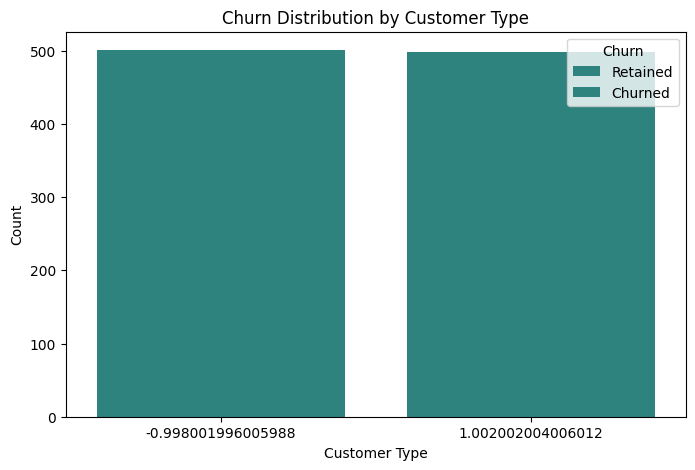

In [ ]:
#2. Churn by Customer Type
plt.figure(figsize=(8, 5))
sns.countplot(x='Customer type', hue='Churn', data=data, palette='viridis')
plt.title("Churn Distribution by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Retained", "Churned"])
plt.show()


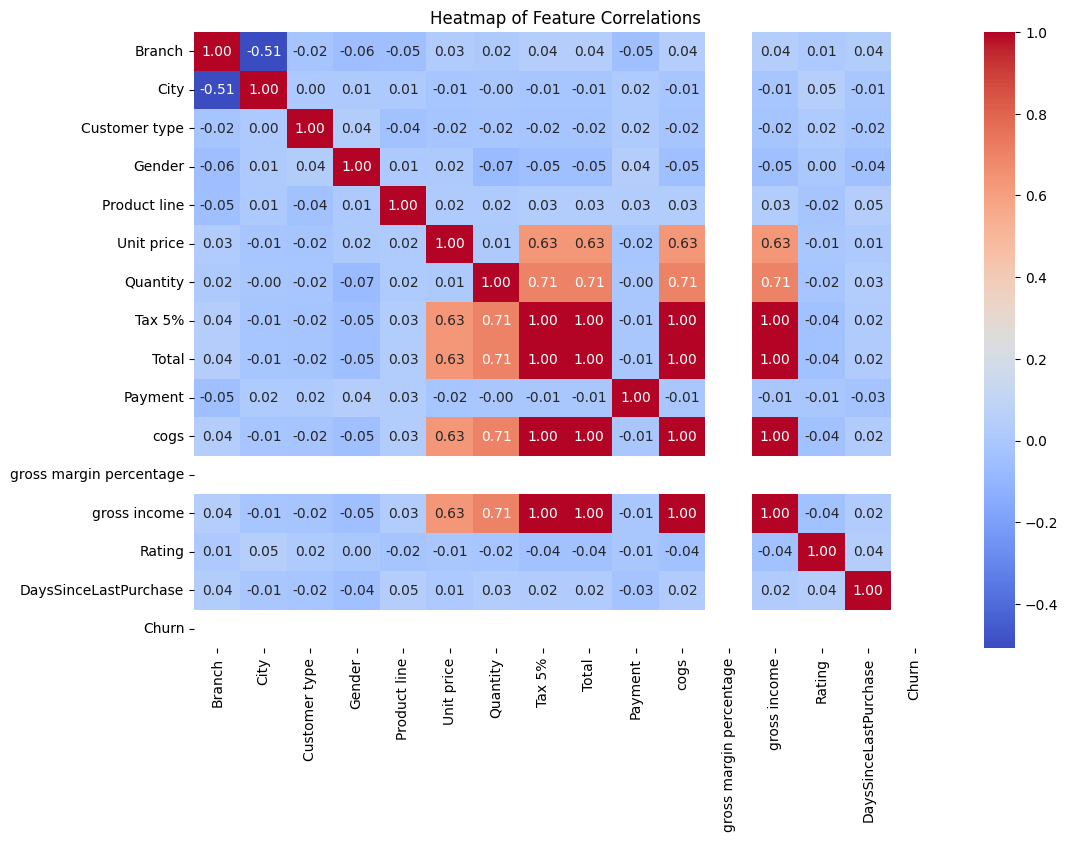

In [ ]:
#3. Heatmap of Correlations
plt.figure(figsize=(12, 8))
# Exclude non-numeric columns from correlation calculation
numeric_data = data.select_dtypes(include=['number']) # Select only numeric columns
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap of Feature Correlations")
plt.show()

<ipython-input-10-67ba214beb80>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Total', hue='Churn', data=data, ci=None, palette='Set2')


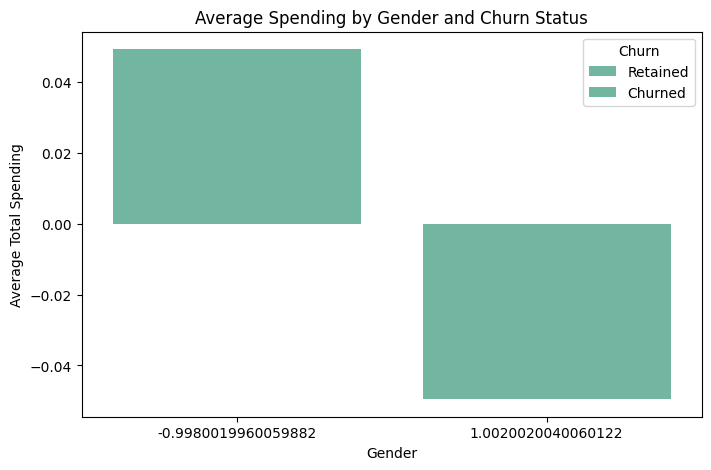

In [ ]:
#4. Average Spending by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Total', hue='Churn', data=data, ci=None, palette='Set2')
plt.title("Average Spending by Gender and Churn Status")
plt.xlabel("Gender")
plt.ylabel("Average Total Spending")
plt.legend(title="Churn", labels=["Retained", "Churned"])
plt.show()


<ipython-input-11-9657c81a6f23>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Rating', data=data, palette='Set1')


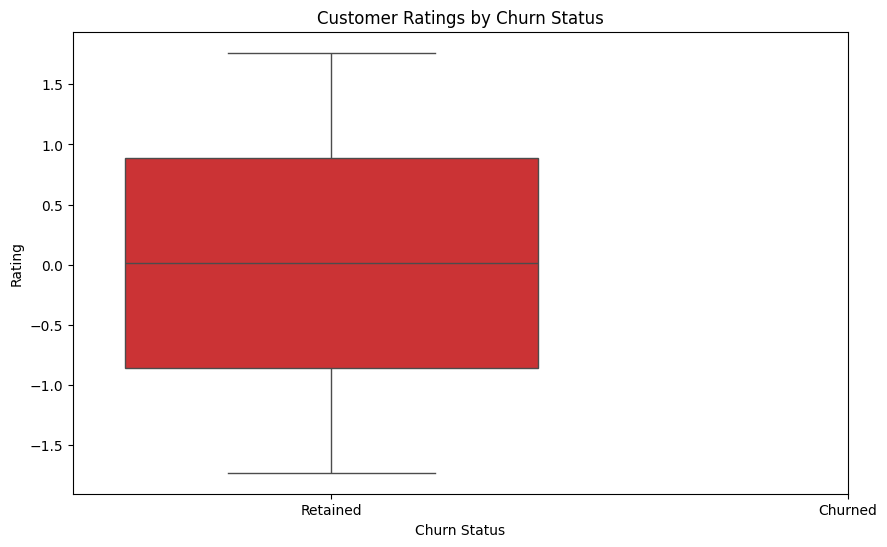

In [ ]:
#5. Churn by Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Rating', data=data, palette='Set1')
plt.title("Customer Ratings by Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Rating")
plt.xticks([0, 1], ["Retained", "Churned"])
plt.show()
